## Importing the libraries

In [0]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from google.colab import drive
drive.mount('/content/drive')
from matplotlib.colors import ListedColormap
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Importing the dataset

In [0]:
dataset = pd.read_csv('./drive/My Drive/Idukki_dataset/short_database_idukki.csv')
# remove outliers (-9999) from all columns and delete corresponding entire row.
# this accounts for 5% of total data.

dataset = dataset[dataset.geology != -9999] #drop geology outliers
dataset = dataset[dataset.geomorphology != -9999] #drop geomorphology outliers
dataset = dataset[dataset.dem != -9999] #drop dem outliers
dataset = dataset[dataset.rainfall != -9999] #drop rainfall outliers
dataset = dataset[dataset['road distance'] != -9999] #drop road distance outliers
dataset = dataset[dataset.slope != -9999] #drop slope outliers
dataset = dataset[dataset.stream_power_index != -9999] #drop stream_power_index outliers
dataset = dataset[dataset['distance from streams'] != -9999] #drop distance from streams outliers
dataset = dataset[dataset.topographic_wetness_index != -9999] #drop topographic_wetness_index outliers
dataset = dataset[dataset.distance_from_lineaments != -9999] #drop distance_from_lineaments outliers

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
print(f'After filtering outliers, X shape: {X.shape} y shape: {y.shape}')

After filtering outliers, X shape: (296759, 12) y shape: (296759,)


In [0]:
print(f'y data positive: {np.count_nonzero(y == 1)/len(y) * 100}')
dataset.describe()

y data positive: 13.460080401942317


,Longitude,Lattitude,geology,geomorphology,dem,rainfall,road distance,slope,stream_power_index,distance from streams,topographic_wetness_index,distance_from_lineaments,Landslide
count,296759.000000,296759.000000,296759.000000,296759.000000,296759.000000,296759.000000,296759.000000,296759.000000,296759.000000,296759.000000,296759.000000,296759.000000,296759.000000
mean,76.922005,9.866787,3.020710,1.797742,1.486499,1.486499,2.519213,2.367200,1.995667,1.428091,3.048113,3.217722,0.134601
std,0.044112,0.043504,0.142413,0.741522,0.499819,0.499819,1.198152,1.007293,0.364939,0.760744,0.703476,1.724394,0.341297
min,76.842500,9.788333,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,0.000000
25%,76.883889,9.829167,3.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,3.000000,2.000000,0.000000
50%,76.921944,9.867222,3.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,3.000000,3.000000,0.000000
75%,76.960278,9.904444,3.000000,2.000000,2.000000,2.000000,3.000000,3.000000,2.000000,2.000000,3.000000,4.000000,0.000000
max,76.998889,9.944722,4.000000,4.000000,2.000000,2.000000,6.000000,7.000000,5.000000,5.000000,5.000000,6.000000,1.000000


In [0]:
#plot histogram helper function
def plot_histogram(axis_id, data_col, title):
  axis_id.hist(data_col)
  axis_id.set_title(title)

empty values: 0.0 %
feautures: Index(['Longitude', 'Lattitude', 'geology', 'geomorphology', 'dem', 'rainfall',
       'road distance', 'slope', 'stream_power_index', 'distance from streams',
       'topographic_wetness_index', 'distance_from_lineaments'],
      dtype='object')


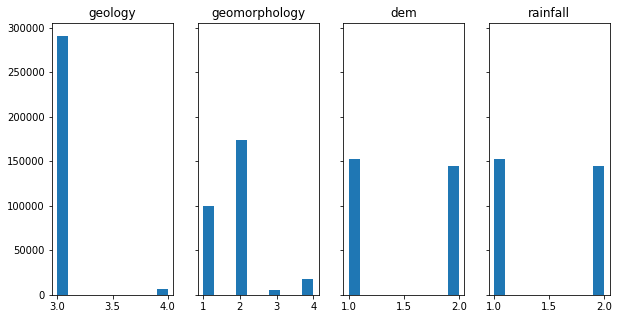

In [0]:
geology_col = dataset['geology']
geomorphology_col = dataset['geomorphology']
dem_col = dataset['dem']
rainfall_col = dataset['rainfall']

road_distance_col = dataset['road distance']
slope_col = dataset['slope']
stream_power_index_col = dataset['stream_power_index']
distance_from_streams_col = dataset['distance from streams']

fig, (ax) = plt.subplots(ncols=4, nrows=1, sharey=True, figsize=(10, 5))

plot_histogram(ax[0], geology_col, title='geology')
plot_histogram(ax[1], geomorphology_col, title='geomorphology')
plot_histogram(ax[2], dem_col, title='dem')
plot_histogram(ax[3], rainfall_col, title='rainfall')

count_empty_field = np.count_nonzero(dem_col == -9999)
percent_empty_val = count_empty_field/len(dem_col) * 100
print(f"empty values: {percent_empty_val} %")

#features
features = dataset.columns[:-1]
print(f"feautures: {features}")

## Splitting the dataset into the Training set and Test set

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
print('X_train shape:')
print(X_train.shape)
print('y_train shape:')
print(y_train.shape)
print('X_test shape:')
print(X_test.shape)
print('y_test shape:')
print(y_test.shape)

X_train shape:
(237407, 12)
y_train shape:
(237407,)
X_test shape:
(59352, 12)
y_test shape:
(59352,)


# Random Forest Classifier

In [0]:
def generate_features_weightage_plot(feature_imp):
  # Creating a bar plot
  sns.barplot(x=feature_imp, y=feature_imp.index)
  # Add labels to your graph
  plt.xlabel('Feature Importance Score')
  plt.ylabel('Features')
  plt.title("Visualizing Important Features")
  plt.legend()
  plt.show()

No handles with labels found to put in legend.


Accuracy with all features: 0.978753875185335
feature_imp:
Lattitude                    0.408837
Longitude                    0.396365
distance_from_lineaments     0.057305
road distance                0.045714
slope                        0.026788
distance from streams        0.017623
geomorphology                0.014404
topographic_wetness_index    0.013836
rainfall                     0.006346
dem                          0.006298
stream_power_index           0.005790
geology                      0.000695
dtype: float64


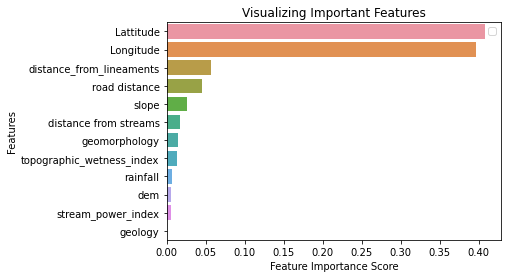

In [0]:
# using all the features available
# Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy with all features:",metrics.accuracy_score(y_test, y_pred))

# importances of features currently
feature_imp = pd.Series(clf.feature_importances_,index=features).sort_values(ascending=False)
print(f"feature_imp:")
print(feature_imp)

generate_features_weightage_plot(feature_imp=feature_imp)

No handles with labels found to put in legend.


Accuracy with lat and long features removed: 0.869237767893247
feature_imp:
distance_from_lineaments     0.278200
road distance                0.264284
distance from streams        0.111866
geomorphology                0.104991
slope                        0.096689
topographic_wetness_index    0.047842
dem                          0.030353
rainfall                     0.029295
stream_power_index           0.025194
geology                      0.011286
dtype: float64


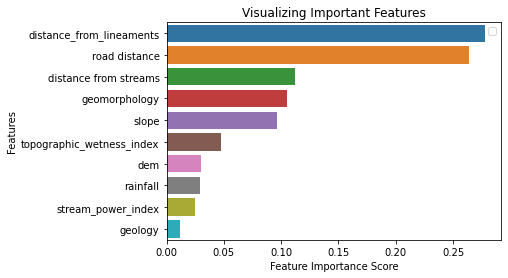

In [0]:
# removing features lat and long since they assume all the importance
# and trying with remaining 10 features.
features_modified = ['geology', 'geomorphology', 'dem', 
                     'rainfall', 'road distance', 'slope', 
                     'stream_power_index', 'distance from streams', 
                     'topographic_wetness_index', 'distance_from_lineaments']
X = dataset[features_modified]
y = dataset['Landslide']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy with lat and long features removed:",metrics.accuracy_score(y_test, y_pred))

# importances of features currently
feature_imp = pd.Series(clf.feature_importances_,index=features_modified).sort_values(ascending=False)
print(f"feature_imp:")
print(feature_imp)

generate_features_weightage_plot(feature_imp=feature_imp)

In [0]:
# based on the finding from graph, some features at the lower end could be removed.
# ref: https://www.datacamp.com/community/tutorials/random-forests-classifier-python
# 'Lattitude', 'Longitude', 'distance_from_lineaments', 'road distance', 'slope', 
# 'distance from streams','geomorphology', 'topographic_wetness_index' 
features_modified = ['Lattitude', 'Longitude', 'distance_from_lineaments', 
                    'road distance', 'slope', 'distance from streams',
                    'geomorphology', 'topographic_wetness_index']
X = dataset[features_modified]
y = dataset['Landslide']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
# check if accuracy has improved
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# Model Accuracy, how often is the classifier correct?
y_pred=clf.predict(X_test)
print("Accuracy with least important features dropped:",metrics.accuracy_score(y_test, y_pred))

## Trying with non-classified dataset

In [0]:
df_non_class = pd.read_csv('./drive/My Drive/Idukki_dataset/short_data_idukki_non-classified.csv')
# remove outliers
df_non_class = df_non_class[df_non_class['Aspect'] != -9999]
df_non_class = df_non_class[df_non_class['roaddis'] != -9999]
df_non_class = df_non_class[df_non_class['slope'] != -9999]
df_non_class = df_non_class[df_non_class['spi'] != -9999]
df_non_class = df_non_class[df_non_class['strdis'] != -9999]
df_non_class = df_non_class[df_non_class['twi'] != -9999]
df_non_class = df_non_class[df_non_class['dem'] != -9999]
df_non_class.describe()

,Longitude,Lattitude,Aspect,lineadis,rainfall,roaddis,slope,spi,strdis,twi,dem,Landslide
count,281082.000000,281082.000000,281082.000000,281082.000000,281082.000000,281082.000000,281082.000000,281082.000000,281082.000000,281082.000000,281082.000000,281082.000000
mean,76.920599,9.869717,169.977307,1904.690919,3444.510939,1494.679976,19.444350,10.968168,1004.510198,4.594491,522.099651,0.138725
std,0.044590,0.042766,104.471427,1305.487694,16.096581,1098.752495,9.426984,5.887097,1010.644179,0.693494,233.031596,0.345660
min,76.842500,9.788333,0.194888,0.000000,3363.710000,0.000000,0.000000,0.176743,0.000000,2.462460,-49.000000,0.000000
25%,76.881667,9.834167,64.698600,858.021000,3438.490000,577.062000,12.233900,6.517930,254.558000,4.110800,417.000000,0.000000
50%,76.919167,9.871111,191.915000,1730.920000,3450.830000,1306.980000,19.310300,10.512700,615.549000,4.449810,574.000000,0.000000
75%,76.960278,9.906389,249.386000,2684.120000,3454.450000,2193.290000,26.167100,14.755300,1489.460000,4.927840,690.000000,0.000000
max,76.998889,9.944722,360.000000,6705.520000,3467.750000,5666.270000,68.651400,76.702500,4844.140000,8.535450,1092.000000,1.000000


In [0]:
X = df_non_class.iloc[:, 0:-1].to_numpy()
y = df_non_class.iloc[:, -1].to_numpy()
features_engg = ['Aspect', 'lineadis', 'rainfall', 
            'roaddis','slope', 'spi', 
            'strdis', 'twi', 'dem']

X = df_non_class[features_engg]
y = df_non_class['Landslide']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

# print sizes
print(f'X shape: {X.shape}, y shape: {y.shape}')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
print(f'X_train shape: {X_train.shape}, y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}, y_test shape: {y_test.shape}')
print(f'true values: {np.count_nonzero(y == 1)/len(y) * 100} %')

X shape: (281082, 11), y shape: (281082,)
X_train shape: (224865, 11), y_train shape: (224865,)
X_test shape: (56217, 11), y_test shape: (56217,)
true values: 13.8724642630976 %


X shape: (281082, 9), y shape: (281082,)
X_train shape: (224865, 9), y_train shape: (224865,)
X_test shape: (56217, 9), y_test shape: (56217,)
true values: 13.8724642630976 %


No handles with labels found to put in legend.


Accuracy with lat and long features removed: 0.9746873721472152
feature_imp:
rainfall    0.224284
roaddis     0.175730
lineadis    0.165959
strdis      0.141981
dem         0.124053
Aspect      0.065502
slope       0.037650
spi         0.032490
twi         0.032350
dtype: float64


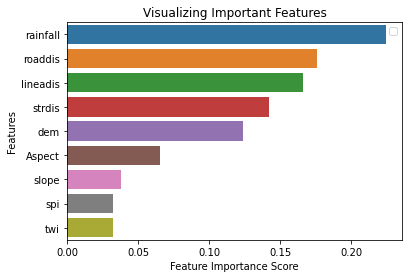

In [0]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy with lat and long features removed:",metrics.accuracy_score(y_test, y_pred))

# importances of features currently
feature_imp = pd.Series(clf.feature_importances_,index=features_engg).sort_values(ascending=False)
print(f"feature_imp:")
print(feature_imp)

generate_features_weightage_plot(feature_imp=feature_imp)

In [0]:
# calculation of TP, TN, FP, FN and sensitivity
print(f'y_pred shape: {y_pred.shape}, y_test shape: {y_test.shape}')
# TP and FP
tot_posit = np.count_nonzero(y_test == 1)
print(f'total positives in test data: {tot_posit}')
# idx where test data is positive
idx_posit = np.where(y_test == 1)
# for same idx, check y_pred. ideally these two vectors should be matching
y_pred_pos = y_pred[idx_posit]
TP =np.count_nonzero(y_pred_pos == 1)
print(f'number of true positives: {TP}')
FP = np.count_nonzero(y_pred_pos != 1)
print(f'number of false positives: {FP}')
# TODO: use the idx_posit if row details of failing cases required.

# TN and FN
tot_negat = np.count_nonzero(y_test == 0)
print(f'total negatives in test data: {tot_negat}')
# idx where test data is positive
idx_negat = np.where(y_test == 0)
# for same idx, check y_pred. ideally these two vectors should be matching
y_pred_negat = y_pred[idx_negat]
TN = np.count_nonzero(y_pred_negat == 0)
print(f'number of true negatives: {TN}')
FN = np.count_nonzero(y_pred_negat != 0)
print(f'number of false negatives: {FN}')
#Calculating sensitivity, specificity, likelihood ratio and distance from perfect point
sensitivity = TP/(TP+FN)
specificity = TN/(FP+TN)
print (f'sensitivity: {sensitivity}')
print (f'specificity: {specificity}')
LR = sensitivity/(1-specificty)
print (f'Likelihood ratio: {LR}')
Dist_PP = math.sqrt(math.pow((1-sensitivity),2)+math.pow((1-specificity),2))
print (f'Distance from perfect point: {Dist_PP}')


NameError: ignored